# `Loading Library`

In [1]:
!pip install ultralytics
!pip install roboflow

In [ ]:
import os
import glob
import random
from PIL import Image as PILImage
import matplotlib.pyplot as plt
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import display, Image

# `Loading Data`

In [3]:
rf = Roboflow(api_key="A0JN8vO130atlzhwM2JN")
project = rf.workspace("ayyub-alzahem").project("brain-tumor-aeizh")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BRAIN-TUMOR-6 in yolov8:: 100%|██████████| 6138/6138 [00:01<00:00, 5349.02it/s]


# `Training Model Using YOLOV8`

In [ ]:
model = YOLO('yolov8s.pt')

# Train the model
model.train(data="/content/BRAIN-TUMOR-6/data.yaml", epochs=50, imgsz=640, batch=128)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/BRAIN-TUMOR-6/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798cb06f9c40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# `Evaluate Model`

In [5]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

metrics = model.val(
    data="/content/BRAIN-TUMOR-6/data.yaml",
    imgsz=640,
    conf=0.25,
    iou=0.6,
    save=True,
    plots=True
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1692.3±714.6 MB/s, size: 105.2 KB)
val: Scanning /content/BRAIN-TUMOR-6/valid/labels.cache... 203 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 203/203 479.7Kit/s 0.0s
val: /content/BRAIN-TUMOR-6/valid/images/2020_png.rf.61a66efb749331bdac56346e44ca5f50.jpg: 1 duplicate labels removed
val: /content/BRAIN-TUMOR-6/valid/images/2021_png.rf.5cd6eae0992324aa37a36c7981806d5d.jpg: 1 duplicate labels removed
val: /content/BRAIN-TUMOR-6/valid/images/2022_png.rf.2427cbeb89c097f7029e633dcf5d6ea4.jpg: 1 duplicate labels removed
val: /content/BRAIN-TUMOR-6/valid/images/2023_png.rf.6d719b9c88bf976ca7c74eccae578bd5.jpg: 1 duplicate labels removed
val: /content/BRAIN-TUMOR-6/valid/images/2024_png.rf.fae606ade6fc791603be2a560792976c.jpg: 1 duplicate labels removed
val: /co

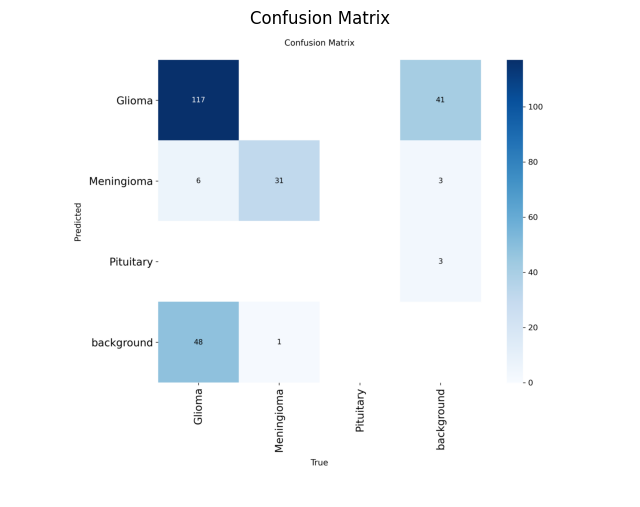

In [11]:
img = PILImage.open("runs/detect/val/confusion_matrix.png")

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()

## `Test Model -> In Random Image`

📷 Selected image: /content/BRAIN-TUMOR-6/valid/images/888_png.rf.426c8a105e9624092665492fd20a02af.jpg

image 1/1 /content/BRAIN-TUMOR-6/valid/images/888_png.rf.426c8a105e9624092665492fd20a02af.jpg: 640x640 1 Glioma, 6.6ms
Speed: 3.2ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict7

🧠 Detection Results:
Class: Glioma | Confidence: 0.85 | Box: [633.531494140625, 579.4324951171875, 890.7158813476562, 794.0409545898438]


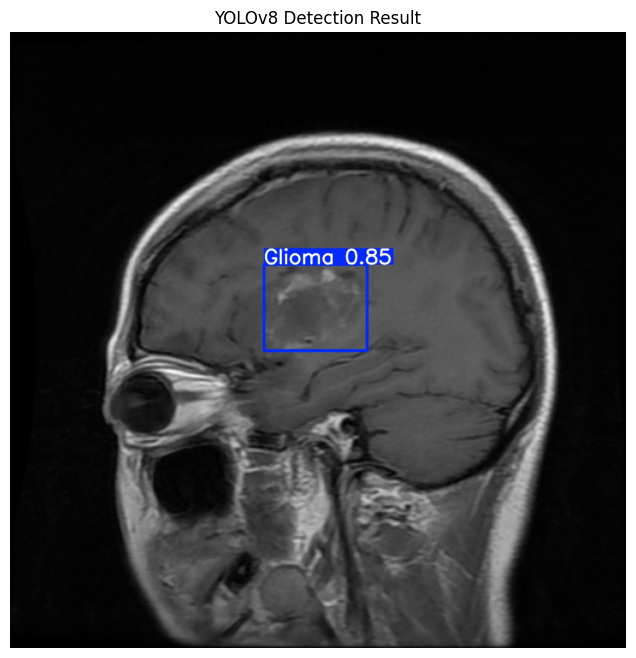

In [18]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

image_dir = "/content/BRAIN-TUMOR-6/valid/images"
image_paths = glob.glob(os.path.join(image_dir, "*.*"))

assert len(image_paths) > 0, "❌ No images found in validation directory"

random_image = random.choice(image_paths)
print(f"📷 Selected image: {random_image}")

# 3️⃣ Run prediction
results = model.predict(
    source=random_image,
    conf=0.5,
    save=True
)

# 4️⃣ Print detection results
print("\n🧠 Detection Results:")
for box in results[0].boxes:
    class_id = int(box.cls)
    confidence = float(box.conf)
    bbox = box.xyxy.tolist()[0]

    class_name = model.names[class_id]
    print(f"Class: {class_name} | Confidence: {confidence:.2f} | Box: {bbox}")

# 5️⃣ Display saved prediction image
saved_dir = results[0].save_dir
image_name = os.path.basename(random_image)
predicted_image_path = os.path.join(saved_dir, image_name)

img = PILImage.open(predicted_image_path)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 Detection Result")
plt.show()

---